<a href="https://colab.research.google.com/github/LEOWJSheng/Machine-Learning/blob/main/MachineLearningAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import data file**#

In [3]:
from google.colab import files
import io
import pandas as pd
import numpy as np

data = files.upload()

Saving House Pricing.csv to House Pricing.csv


##**Read data and display data**#

In [4]:
df = pd.read_csv("House Pricing.csv")
df_copy = df.copy(deep = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#**Convert data into numerical**#

In [9]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['guestroom']=df['guestroom'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [11]:
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [12]:
df.drop(['furnishingstatus'], axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#**Data Visualization**#

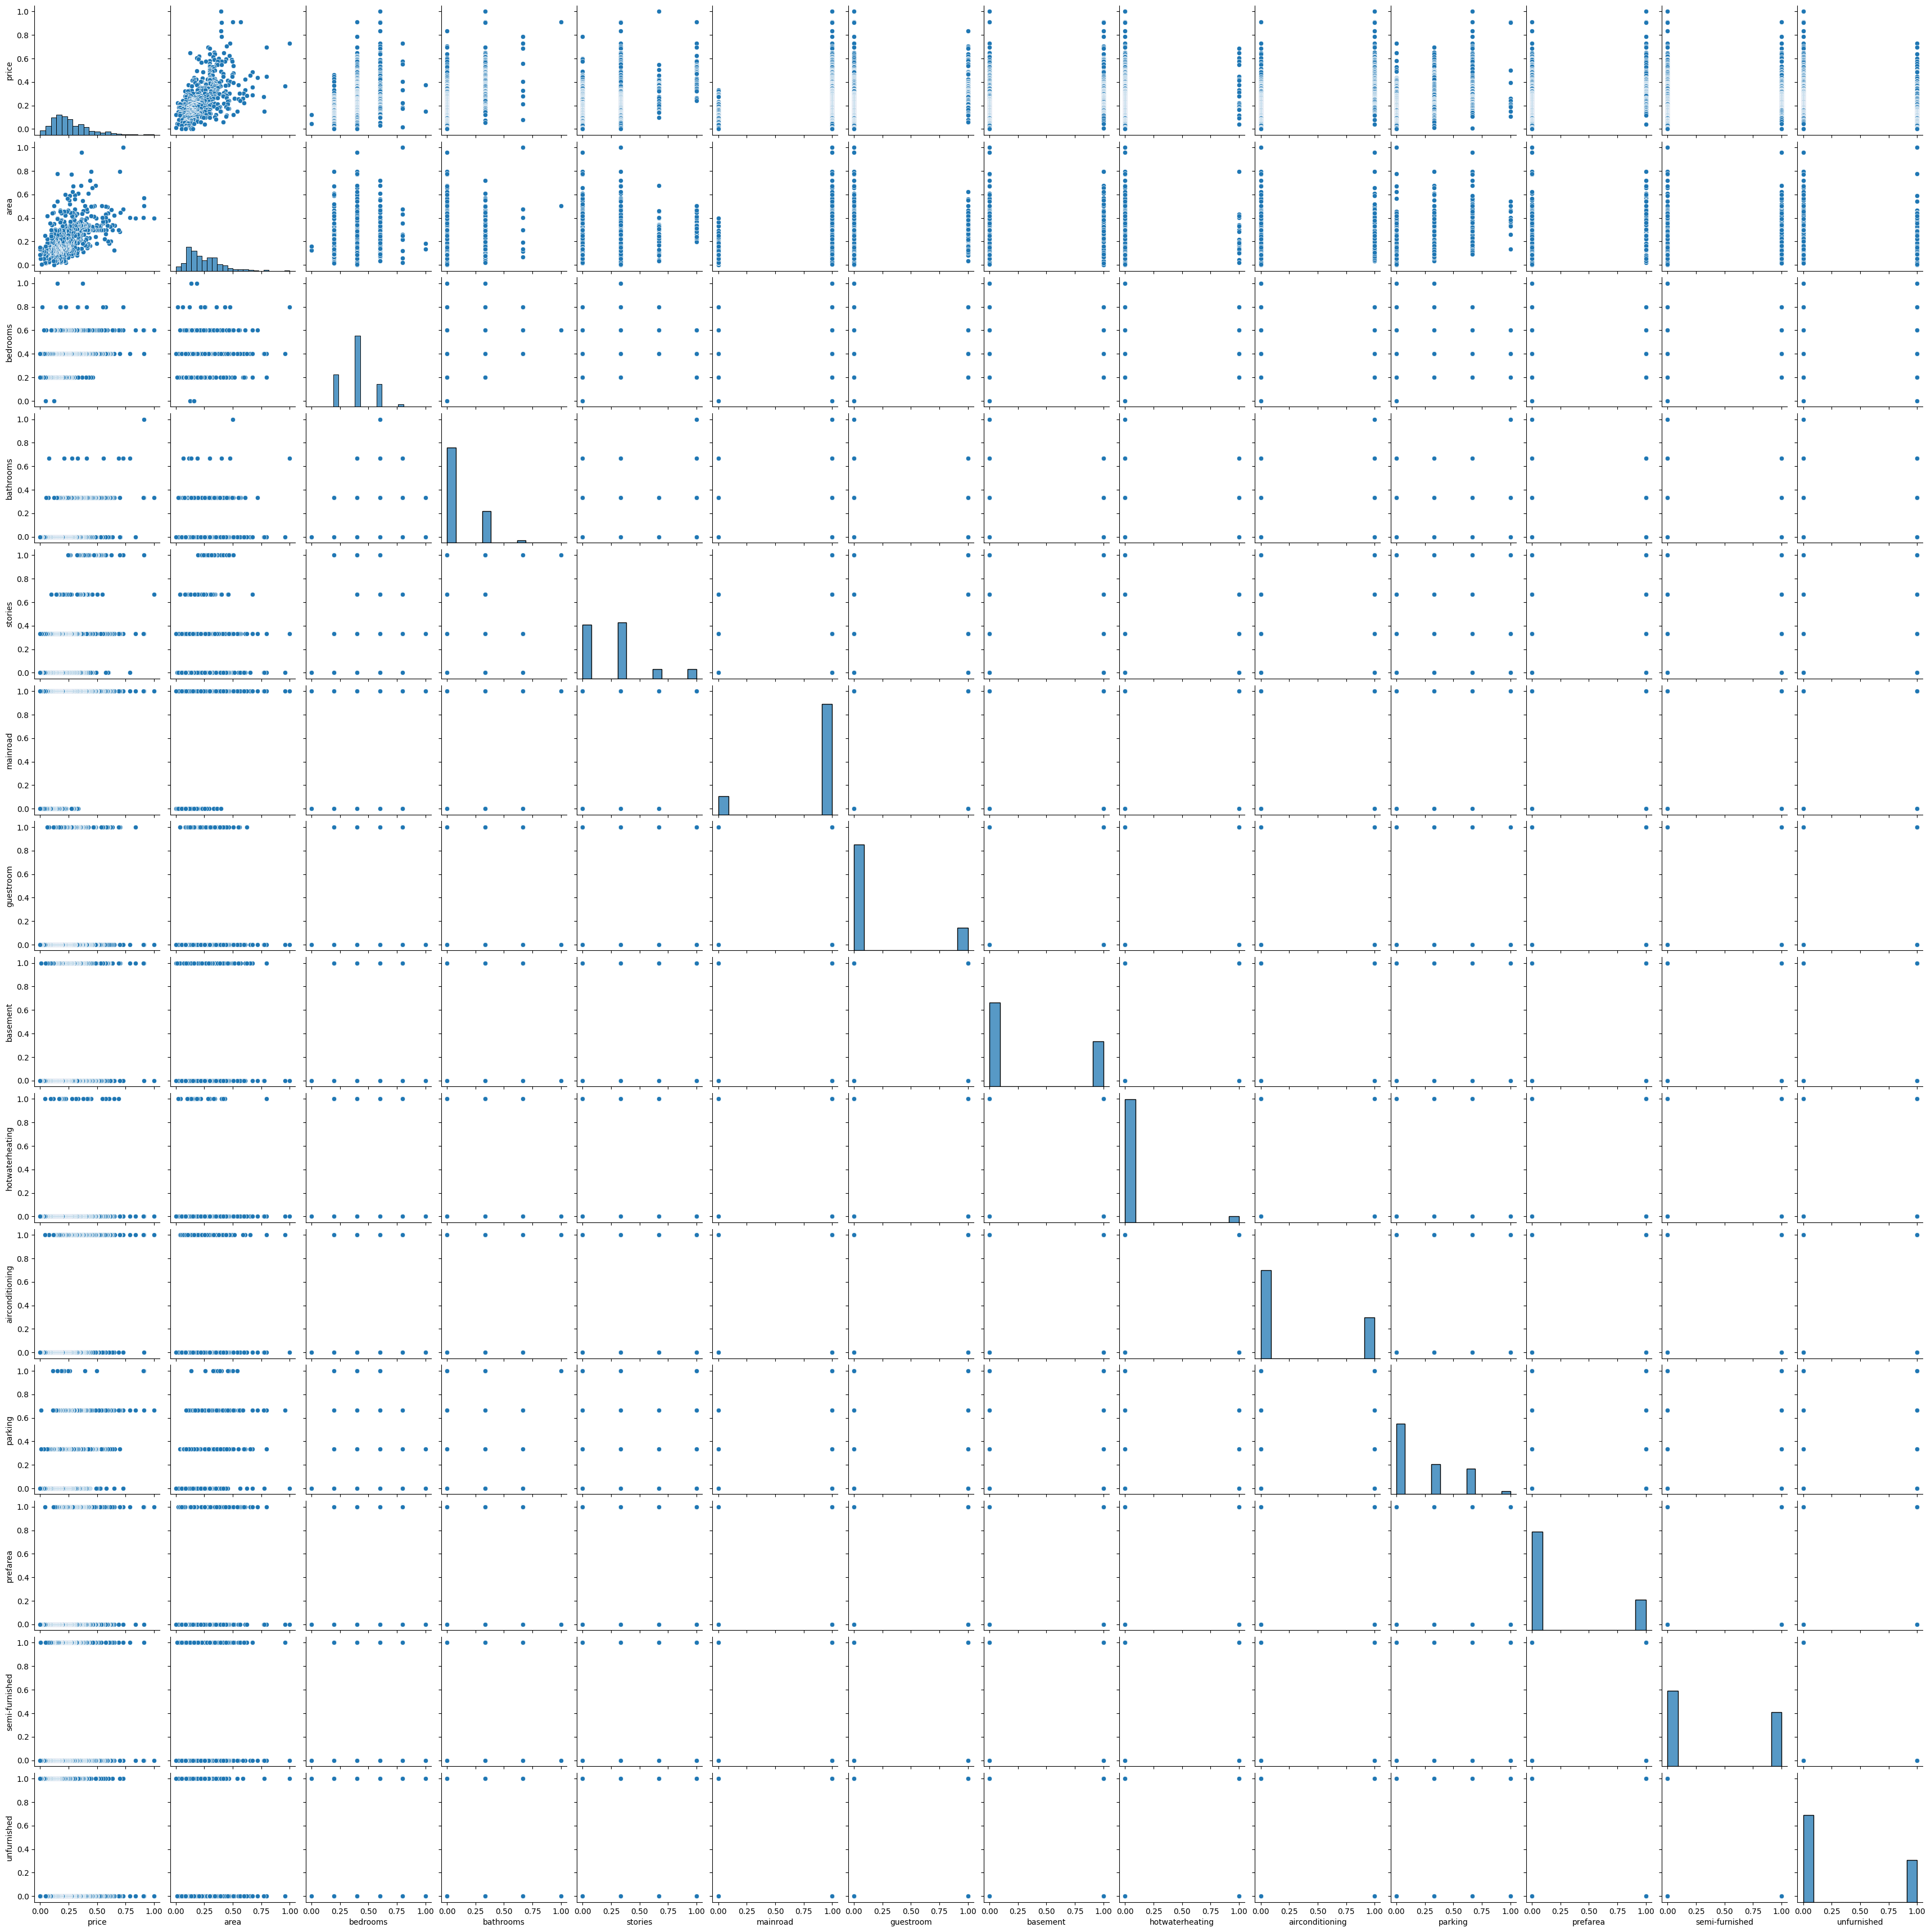

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)  
plt.show() 

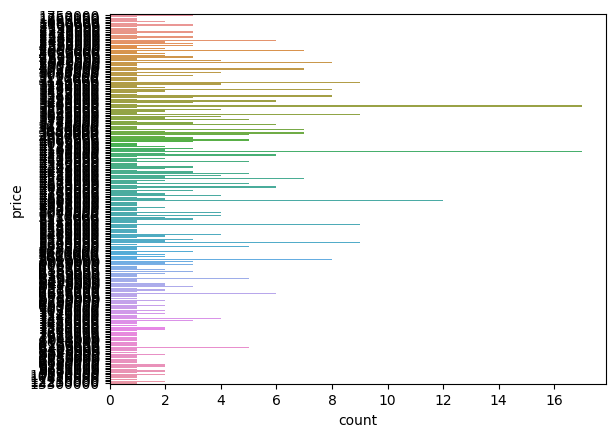

In [25]:
sns.countplot(y='price', data=df_copy)
plt.show()

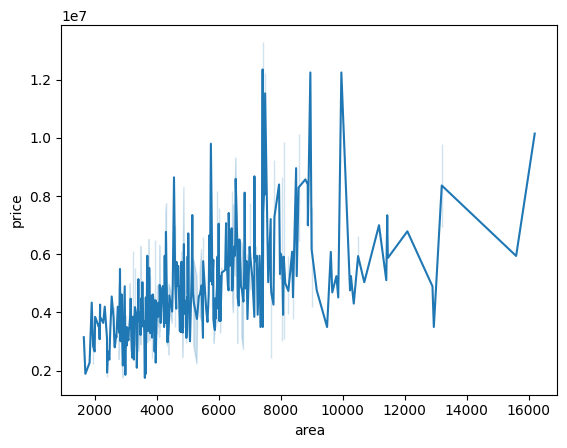

In [26]:
sns.lineplot(x='area', y='price', data=df_copy)
plt.show()

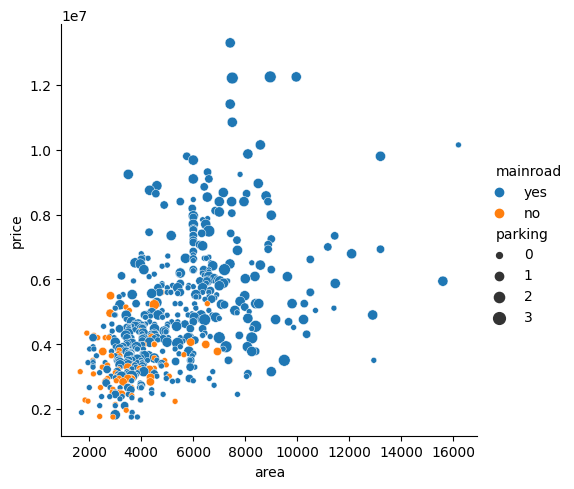

In [27]:
sns.relplot(x='area',y='price',hue='mainroad',size='parking',data=df_copy)

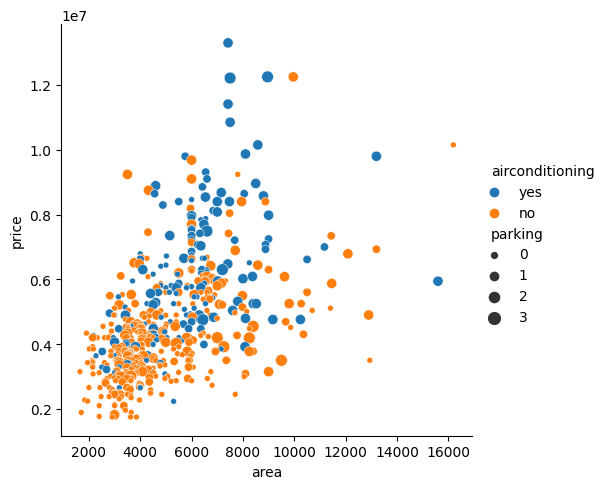

In [28]:
sns.relplot(x='area',y='price',hue='airconditioning',size='parking',data=df_copy)

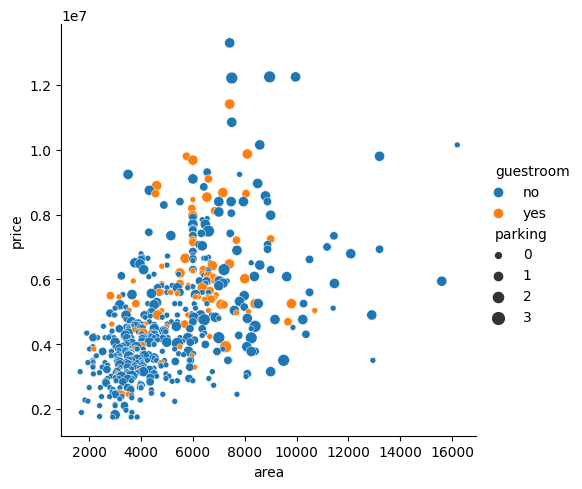

In [29]:
sns.relplot(x='area',y='price',hue='guestroom',size='parking',data=df_copy)

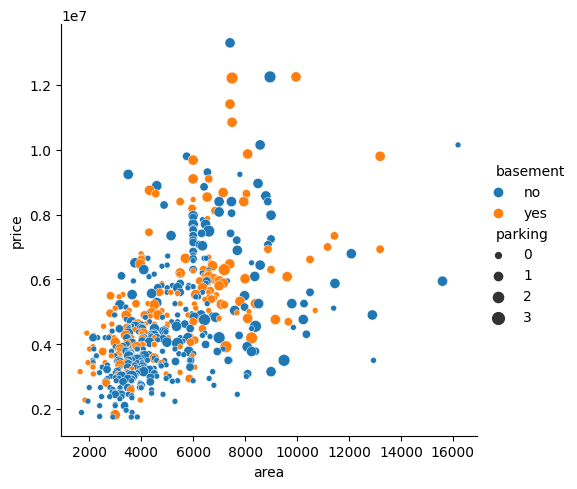

In [30]:
sns.relplot(x='area',y='price',hue='basement',size='parking',data=df_copy)

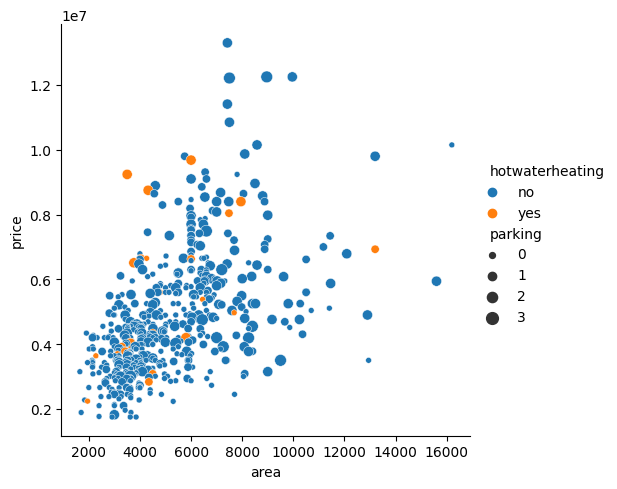

In [31]:
sns.relplot(x='area',y='price',hue='hotwaterheating',size='parking',data=df_copy)

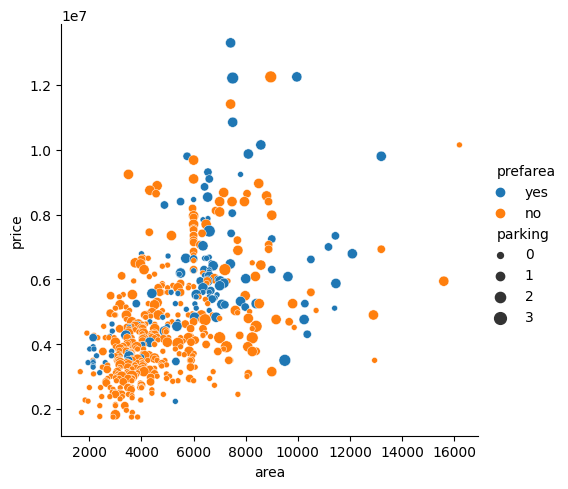

In [32]:
sns.relplot(x='area',y='price',hue='prefarea',size='parking',data=df_copy)

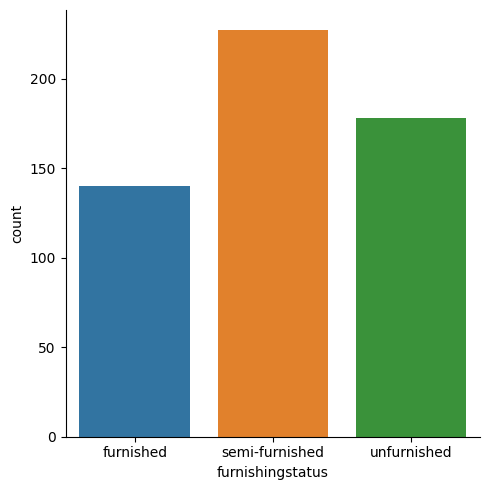

In [33]:
sns.catplot(x='furnishingstatus',kind='count',data=df_copy ,orient='h')

##**Normalization Data**##

In [34]:
def normalize(x):
  return ((x-np.min(x))/(max(x)-min(x)))

df=df.apply(normalize)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0


##**Split Data into training and testing set**##

In [35]:
from sklearn.model_selection import train_test_split

y = df['price']
x = df.drop('price', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

#**Model Building**#

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
model.coef_

array([ 0.30669852,  0.03927392,  0.29543931,  0.10542739,  0.04979432,
        0.03332446,  0.02404656,  0.07340739,  0.0731669 ,  0.06282414,
        0.05233502, -0.00882935, -0.03698674])

In [59]:
model.intercept_

0.022440769900672147

##**Model Prediction**##

In [60]:
y_pred = model.predict(x_test)

#**Model Evaluation**#

##**Graphical Evaluation**##

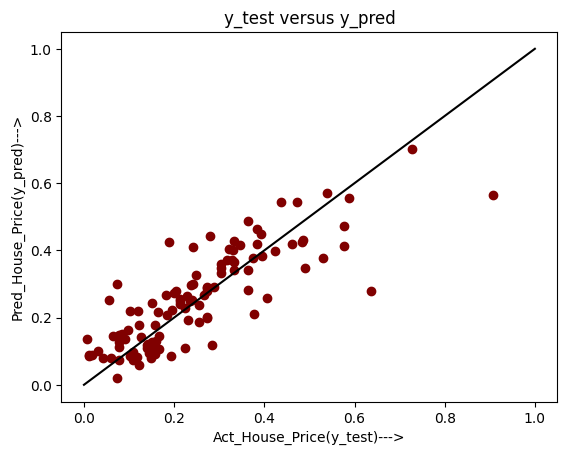

In [61]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Act_House_Price(y_test)--->')                         
plt.ylabel('Pred_House_Price(y_pred)--->') 
plt.show()

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

mean_squared_error(y_test, y_pred)

0.008449060600173058

In [63]:
r2_score(y_test, y_pred)

0.680653940787068